[0. 3. 1. 1. 4. 1. 2. 3. 3. 2. 5. 2. 2. 1. 2. 4. 6. 2. 7. 2. 2. 3. 2. 3.
 3. 2. 2. 2. 4. 4. 2. 3. 2. 4. 4. 2. 2. 4. 3. 3. 1. 3. 2. 1. 3. 3. 4. 1.
 1. 3. 1. 2. 4. 3. 0. 2. 4. 2. 1. 5. 1. 2. 1. 4. 1. 2. 2. 2. 4. 2. 3. 3.
 5. 4. 3. 4. 0. 3. 2. 5. 3. 4. 5. 3. 3. 1. 2. 4. 3. 4. 3. 1. 1. 1. 4. 4.
 2. 3. 2. 2.]
100


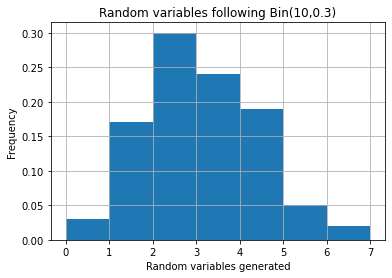

In [1]:
## Generate 100 random numbers for Bin(n,p) = Bin(10,0.3)

## First generate a U~(0,1) using LCG 

import numpy as np
import matplotlib.pyplot as plt
import math


n = 1000
x = np.zeros(n)
x[0] = 1000
a = 16807
c = 0
m = 2147483647
U = np.zeros(n)

for i in range(0, n - 1):
    x[i + 1] = ((a * x[i]) + c) % m
    
## Generate random numbers and then the Ber(p) / Generating Bernoulli distribution

p = 0.3
B = np.zeros(n)

for i in range(n):
    U[i] = x[i] / m
    if U[i]<=p:
        B[i] = 1
    else:
        B[i] = 0
        
#print(B)

## Generate Binomial using above generated bernoulli

bin = np.zeros(100)
for j in range(1,100):
    sum = 0
    for i in range (1,10):
        sum = B [10*j -10 + i] + sum
    bin[j] = sum




print(len(bin))           

plt.figure(1)
plt.hist(bin,bins=7,density=True)
plt.xlabel("Random variables generated")
plt.ylabel("Frequency")
plt.title("Random variables following Bin(10,0.3)")
plt.grid()
plt.show()


[0. 5. 2. 3. 2. 1. 1. 3. 3. 4. 3. 2. 3. 4. 3. 3. 1. 3. 5. 5. 1. 4. 3. 1.
 2. 2. 2. 3. 3. 2. 3. 4. 3. 3. 2. 5. 4. 3. 2. 1. 2. 2. 3. 4. 3. 3. 1. 4.
 3. 0. 3. 2. 1. 4. 3. 3. 1. 3. 3. 5. 5. 2. 3. 2. 3. 2. 3. 1. 3. 4. 4. 3.
 4. 3. 4. 2. 4. 3. 1. 0. 3. 4. 5. 3. 1. 3. 2. 3. 6. 2. 4. 2. 2. 3. 3. 2.
 1. 4. 1. 2.]
100


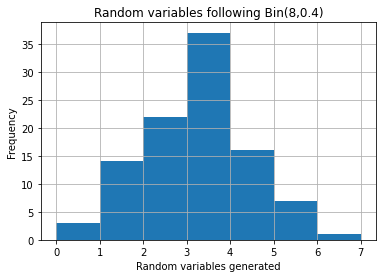

In [4]:
## Generate random numbers using combined generator

import numpy as np 
import matplotlib.pyplot as plt

n = 100
N = 8
m1 = 2**32 - 209
m2 = 2**32 - 22853
p = 0.4

x = np.zeros(n*N)
y = np.zeros(n*N)
U = np.zeros(n*N)   # Generated random numbers 
B = np.zeros(n*N)  # To hold the ber(p) distribution

x[0] = 15
y[0] = 20

x[1] = 8
y[1] = 15

x[2] = 25
y[2] = 5

for i in range(3,n*N):
    x[i] = (1403580*x[i-2] - 810728*x[i-3]) % m1
    y[i] = (527612*y[i-2] - 1370589*y[i-3]) % m2



for i in range(n*N):
    if x[i]<=y[i]:
        U[i] = (x[i]-y[i]+m1)/(m1+1)
    else:
        U[i] = (x[i]-y[i])/(m1+1)
        
    if U[i]<=p:
        B[i] = 1
    else:
        B[i] = 0

bin=np.zeros(n)

for j in range(1,n):
    sum = 0
    for i in range (((j-1)*N)+1,j*N):
        sum = sum + B[i]
    bin[j] = sum

print(bin)

print(len(bin))

## plotting the histogram

plt.figure(1)
plt.hist(bin,bins=range(0,8))
plt.xlabel("Random variables generated")
plt.ylabel("Frequency")
plt.title("Random variables following Bin(8,0.4)")
plt.grid()
plt.show()
